# How many documents the official Microsoft Documentation Webpage have (in English)?

In [13]:
import pandas as pd
import cfscrape
from lxml import etree
from datetime import date

In [2]:
scraper = cfscrape.create_scraper()
header = {'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9',
          'Accept-Encoding': 'gzip, deflate, sdch',
          'Accept-Language' : 'nl-NL,nl;q=0.8,en-US;q=0.6,en;q=0.4',
          'Cache-Control' : 'max-age=0',
          'Connection': 'keep-alive',
          'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36'}

## Defining the initial URL and the number of levels to search for URLs

In [3]:
df = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})
df_totest = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})
df_cache = pd.DataFrame({'url': ["https://docs.microsoft.com/en-us/"]})
level = 8

In [10]:
df_totest = df
df_cache = df
level = 2

In [11]:
df_totest = df

## Running a loop to search for URL in Websites

In [ ]:
for x in range(level):
    
    print("LEVEL:",x)
    
    for url in df_totest['url']:
        print(url)
        try:
            scraped_html=scraper.get(url,headers=header).content
            html = etree.HTML(scraped_html)
            df_temp = pd.DataFrame(html.xpath("//a/@href"), columns=['url']).drop_duplicates()
            df_temp['url'] = df_temp['url'].apply(lambda x: 'https://docs.microsoft.com'+x if x.startswith('/') else x)
            df_temp = df_temp[df_temp['url'].str.contains('docs.microsoft.com/en-us')].drop_duplicates().dropna()
            print(len(df_temp))
            df_cache = df_cache.append(df_temp, ignore_index=True).drop_duplicates().dropna()
        except:
            print("error!")
            next
    
    df_totest = df_cache[~df_cache.isin(df)].drop_duplicates().dropna()
    df = df.append(df_totest,ignore_index=True)
    print(len(df))

## Exporting the data to a .csv file

In [14]:
df.to_csv(date.today().strftime("%Y%m%d")+'_how_many_links_microsoft_docs.csv')

In [15]:
len(df)

104796

## Showing how the data looks like

In [7]:
df.head()

,url
0,https://docs.microsoft.com/en-us/
1,https://docs.microsoft.com/en-us/documentation
2,https://docs.microsoft.com/en-us/learn
3,https://docs.microsoft.com/en-us/answers/
4,https://docs.microsoft.com/en-us/samples/browse/


<h1 align='center'>=======================================================<br>Offline analysis of the links</h1>

## Importing and setting libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # http://matplotlib.org/gallery.html 
plt.style.use('ggplot') # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
%matplotlib inline 

## Loading the data

In [2]:
df = pd.read_csv('how_many_links_microsoft_docs.csv', index_col=0)

## How many entries were retrieved?

In [3]:
len(df)

16043

## How the entries looks like?

In [4]:
df.head()

,url
0,https://docs.microsoft.com/en-us/
1,https://docs.microsoft.com/en-us/learn/
2,https://docs.microsoft.com/en-us/samples/browse/
3,https://docs.microsoft.com/en-us/windows/
4,https://docs.microsoft.com/en-us/azure/


## Making sure all the entries end with '/'

In [5]:
df['url'] = df['url'].apply(lambda x: x+'/'if x.strip()[-1] != '/' else x)

## Extending the data by dividing URLs into layers (i.e. what comes after https://docs.microsoft.com/en-us/)

In [6]:
# Sometimes it ends with '/' sometimes not!
df['level2'] = df['url'].apply(lambda x: x.split('/')[4] if len(x.split('/'))>5 else 'N.A.')
df['level3'] = df['url'].apply(lambda x: x.split('/')[5] if len(x.split('/'))>6 else 'N.A.')
df['level4'] = df['url'].apply(lambda x: x.split('/')[6] if len(x.split('/'))>7 else 'N.A.')
df['level5'] = df['url'].apply(lambda x: x.split('/')[7] if len(x.split('/'))>8 else 'N.A.')

In [7]:
df.head()

,url,level2,level3,level4,level5
0,https://docs.microsoft.com/en-us/,N.A.,N.A.,N.A.,N.A.
1,https://docs.microsoft.com/en-us/learn/,learn,N.A.,N.A.,N.A.
2,https://docs.microsoft.com/en-us/samples/browse/,samples,browse,N.A.,N.A.
3,https://docs.microsoft.com/en-us/windows/,windows,N.A.,N.A.,N.A.
4,https://docs.microsoft.com/en-us/azure/,azure,N.A.,N.A.,N.A.


## Analysing and visualizing the Level2

In [8]:
level2_stats = df['level2'].value_counts()
level2_stats

graph                     3284
azure                     2322
dotnet                    1941
uwp                       1415
windows                   1401
                          ... 
azure-sphere                 1
quantum                      1
microsoft-365-business       1
lyncserver                   1
bonsai                       1
Name: level2, Length: 154, dtype: int64

(-1.102618386896446,
 1.112534411240923,
 -1.1230710909381016,
 1.1088074909367462)

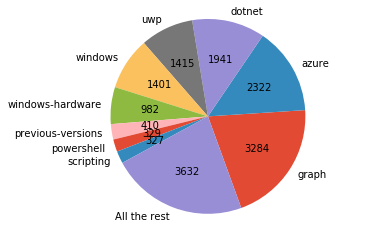

In [9]:
dictionary = level2_stats.to_dict()
threshold = 300

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, 
#      autopct='%1.1f%%', 
       autopct=autopct_format(sizes),
       startangle=290)
ax.axis('equal')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## Analysing and visualizing the Level3 (considering level 2 'Azure')

In [10]:
level3_azure_stats = df[df['level2'].str.contains('azure')]['level3'].value_counts()
level3_azure_stats

devops                                                 505
architecture                                           324
active-directory                                       230
storage                                                 97
sql-database                                            66
                                                      ... 
vs-azure-tools-storage-manage-with-storage-explorer      1
fxt-edge-filer                                           1
cost-management                                          1
data-explorer                                            1
Jenkins                                                  1
Name: level3, Length: 152, dtype: int64

(-1.1013334879920944,
 1.122510060682005,
 -1.1244535400141855,
 1.1101156655867166)

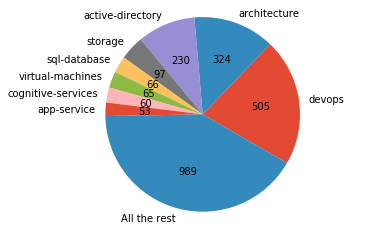

In [11]:
# fig = plt.figure(figsize=(5, 15))
# ax = plt.subplot2grid((1,1), (0,0))
# ax.set_title('Title')
# ax.set_ylim(min,max)
# ax.set_xlim(min,max)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

dictionary = level3_azure_stats.to_dict()
threshold = 50

import itertools
newdic={}
for key, group in itertools.groupby(dictionary, lambda k: 'All the rest' if (dictionary[k]<threshold) else k):
    newdic[key] = sum([dictionary[k] for k in list(group)]) 
    
labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct=autopct_format(sizes), startangle=-30)
ax.axis('equal')
# ax.set_title('Azure topics (aggregating >50 entries)')

# fig.savefig('name.eps', bbox_inches='tight',format='eps', dpi=1200)
# fig.savefig('name.png', bbox_inches='tight',format='png', dpi=1200, transparent=True)
# fig.show()

## (In general) How many documents are related to "Advanced Threat Protection" or "ATP"?

In [12]:
stats_atp = df[df['url'].str.contains('atp|advanced-threat-protection')]
print(len(stats_atp))
stats_atp

42


,url,level2,level3,level4,level5
425,https://docs.microsoft.com/en-us/microsoft-365...,microsoft-365,security,office-365-security,office-365-atp
1297,https://docs.microsoft.com/en-us/azure-advance...,azure-advanced-threat-protection,what-is-atp,N.A.,N.A.
1298,https://docs.microsoft.com/en-us/azure-advance...,azure-advanced-threat-protection,atp-architecture,N.A.,N.A.
1299,https://docs.microsoft.com/en-us/office365/ser...,office365,servicedescriptions,office-365-advanced-threat-protection-service-...,N.A.
1300,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,microsoft-defender-atp
1301,https://docs.microsoft.com/en-us/windows/secur...,windows,security,threat-protection,microsoft-defender-atp
2178,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources,intune-apps-macosmdatpapp
3389,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources,intune-deviceconfig-advancedthreatprotectionon...
3390,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources,intune-deviceconfig-advancedthreatprotectionon...
3782,https://docs.microsoft.com/en-us/graph/api/res...,graph,api,resources,intune-deviceconfig-windowsdefenderadvancedthr...


## The following code came from https://github.com/NinaWie/sunburst on shows how to plot a Sunburst

In [13]:
colour_list = [[0.733, 0.467, 0.518], [0.596, 1.0, 0.322], [0.88, 0.66, 0.795], [0.857, 0.524, 0.531], [0.52, 0.508, 0.61], [0.059, 0.812, 0.753], [0.902, 0.686, 0.725], [0.99, 0.99, 0.6], [0.517, 0.778, 0.821], [0.473, 0.778, 0.406], [0.565, 0.984, 0.573], [0.72, 0.1, 0.657], [0.836, 0.977, 0.736], [0.746, 0.835, 0.83], [0.745, 0.6, 0.439], [0.49, 0.529, 0.725], [0.682, 0.537, 0.689], [0.561, 0.993, 0.936], [0.559, 0.367, 0.794], [0.265, 0.425, 0.825], [0.743, 0.241, 0.1], [0.684, 0.1, 0.327], [0.5, 0.8, 0.99], [0.571, 0.61, 0.292], [0.941, 0.725, 0.553], [0.682, 0.537, 0.689], [0.934, 0.558, 0.516], [0.741, 0.827, 0.576], [0.744, 0.932, 0.921], [0.998, 0.969, 0.942], [0.969, 0.612, 0.831], [0.5, 0.8, 0.99], [1.0, 0.1, 0.437], [0.552, 0.863, 0.908], [0.1, 0.492, 0.104], [0.815, 0.768, 0.763], [1.0, 0.576, 0.494], [0.937, 0.592, 0.031], [0.1, 0.782, 0.594], [0.934, 0.558, 0.516], [0.695, 0.541, 0.524], [0.569, 0.816, 0.796], [1.0, 0.859, 0.4], [0.3, 0.4, 0.7], [0.553, 0.835, 0.576], [0.522, 0.584, 0.882], [1.0, 0.898, 0.008], [0.516, 0.61, 0.524]]

def sunburst(nodes, dic, total=np.pi * 2, offset=0, level=0, ax=None, text_smaller=False):
    """
    Recursive function to make a sunburst plot with an arbitrary number of layers
    This function was only adapted by me, it is taken from stackoverflow (see link in readme)
    @param nodes: list containing classes and number of data for each class
    @param dic: colour dictionary (one RGB color list for each class)
    @param text_smaller: if the text should be split if it is too long.
    """
    ax = ax or plt.subplot(111, projection='polar')

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi *2], color="white")
        ax.text(0, 0, label, ha='center', va='center', fontsize=15)
        if text_smaller:
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax, text_smaller=True)
        else: 
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)
            # sunburst(subnodes, dic, total=total, offset=local_offset,
              #       level=level + 1, ax=ax)
            if text_smaller:
                sunburst(subnodes, dic, total=total, offset=local_offset,
                     level=level + 1, ax=ax, text_smaller=True)
            else: 
                sunburst(subnodes, dic, total=total, offset=local_offset, level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5

        rects = ax.bar(values, heights, widths, bottoms, linewidth=0,
                       edgecolor='white', align='edge')
   
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            if text_smaller:
                if len(label)>18:
                    name = str(label).split(" ")
                    name.insert(-1,"\n")
                    new_label = " ".join(name)
                else: 
                    new_label = label
            else:
                new_label = label
            ax.text(x, y, new_label, rotation=rotation, ha='center', va='center', fontsize=15)
            try:
                rect.set_color(dic[label])
            except KeyError:
                pass

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()
        
def get_data_list(ebene1, ebene2, ebene3=np.array([])):
    """
    Creates correct format for the nodes parameter of the sunburst function
    possible to create a two or three layer sunburst plot
    parameters: columns of the csv for each layer (ebene1 is the innermost circle, ebene2 the second inner one etc.)
    """
    group_freq = stats.itemfreq(ebene1)
    data = []
    for i in group_freq:
        inner_list = []
        filtered_ebene2 = ebene2[np.where(ebene1==i[0])]
        for j in stats.itemfreq(filtered_ebene2):
            inner_inner_list = []
            if len(ebene3)>0:
                filtered_ebene3 = ebene3[np.where(ebene1==i[0])]
                for k in stats.itemfreq(filtered_ebene3[np.where(filtered_ebene2==j[0])]):
                    new_name = str(k[0])
                    inner_inner_list.append((new_name, k[1],[]))
            tup = (j[0], int(j[1]), inner_inner_list)
            # print(j[0].replace("\n", ""), "ratio of ", i[0].replace("\n", ""), ":", int(j[1])/float(int(i[1])))
            inner_list.append(tup)
        data.append((i[0],int(i[1]), inner_list))
        # print("\n ratio of ", i[0].replace("\n", ""), ":", int(i[1])/float(len(ebene1)), "\n")
        
    # for j in stats.itemfreq(ebene2):
        # print("\n ratio of ", j[0], ":", int(j[1])/float(len(ebene2)))

    data_final = [("ATP-related", len(ebene1), data)]
    
    return data_final

def get_colour_dic(ebene1, ebene2, ebene3=np.array([])):
    dic = {}
    colour_counter = 0
    for ebene in ["ebene1", "ebene2", "ebene3"]:
        for e in np.unique(eval(ebene)):
            dic[e] = colour_list[colour_counter]
            colour_counter+=1  
    return dic

def colour_dic_inner(group, klasse, methode=np.array([])):
    dic = {}
    colour_counter = 0
    for e in np.unique(group):
        dic[e] = colour_list[colour_counter]
        colour_counter+=1
            
    new_dic = {}
    for g in np.unique(group):
        try:
            new_dic[g]=dic[g]
            old_g = g
        except KeyError:
            old_g = g.split(" ")
            del(old_g[-2])
            old_g = " ".join(old_g)
            new_dic[g]=dic[old_g]
        inds = np.where(group==g)[0]
        count = 0
        for k in np.unique(klasse[inds]):
            if count%2==0:
            # new_col = np.random.rand(3)*0.1
                col_for_name = np.asarray(dic[old_g])+0.08
            else:
                col_for_name = np.asarray(dic[old_g])-0.08
            count+=1
            col_for_name[col_for_name>1]=1
            col_for_name[col_for_name<0]=0
            # print(col_for_name)
            new_dic[k]= col_for_name # list(np.asarray(dic[old_g])*0.9)
            m_inds = np.where(klasse[inds]==k)
            count_2 = 0
            for m in np.unique(methode[inds][m_inds]):
                if count_2%2==0:
                    col_for_name = np.asarray(new_dic[k])+0.05
                else:
                    col_for_name = np.asarray(new_dic[k])-0.05
                col_for_name[col_for_name>1]=1
                col_for_name[col_for_name<0]=0
                count_2+=1
                new_dic[m]= col_for_name                
    return new_dic

In [14]:
first_level = stats_atp['level2'].values 
second_level = stats_atp['level3'].values
third_level = stats_atp['level4'].values

In [15]:
all_nans = []
for level in ["first_level", "second_level", "third_level"]:
    nans = np.where(pd.isnull(eval(level)))[0]
    for n in nans:
        if n not in all_nans:
            all_nans.append(n)
first_level = np.delete(first_level, all_nans)
second_level = np.delete(second_level, all_nans)
third_level = np.delete(third_level, all_nans)

In [16]:
from scipy import stats

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:74: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`


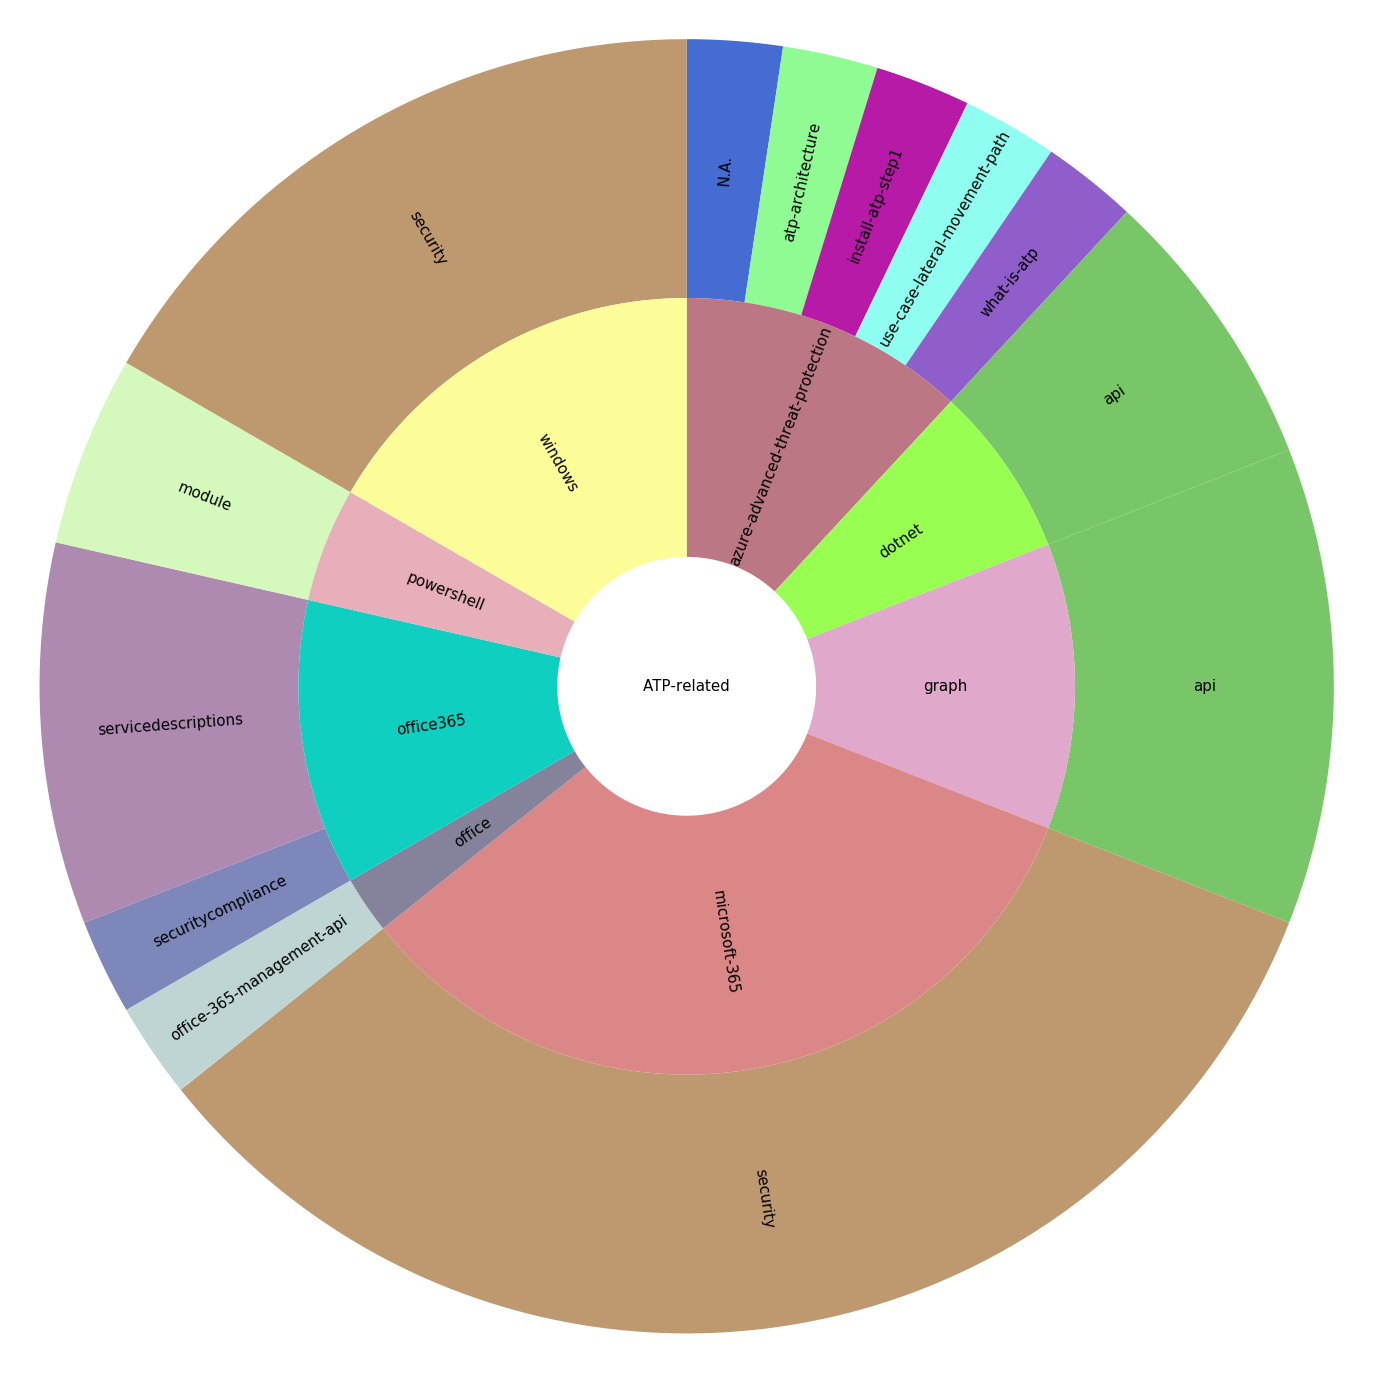

In [17]:
data_sunburst = get_data_list(first_level, second_level)
#                               , third_level)
dic = get_colour_dic(first_level, second_level, third_level)

plt.figure(figsize = (25,25))
sunburst(data_sunburst, dic)
plt.show()